# Pymaceuticals Inc.
---

### Analysis

-  The line plot of tumor volume over time for a mouse treated with Capomulin shows a consistent decrease in tumor volume over the treatment period. This suggests that Capomulin has a positive effect on reducing tumor size. The scatter plot and linear regression analysis for mouse weight and average observed tumor volume in the Capomulin regimen reveal a positive correlation between the two variables. This would suggest that as the weight of the mouse increases, the average tumor volume also tends to increase. The correlation coefficient indicates the strength of the correlation, with a value close to 1 indicating a strong positive relationship. Based on the box plot, we can conclude that both Ramicane and Capomulin are effective at reducing tumor size in comparison with the other drugs tested.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = merged_data["Mouse ID"].nunique()
print(f"Number of mice: {num_mice}")

Number of mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Identify duplicate mice based on Mouse ID and Timepoint
duplicate_mice = merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)

# Get the duplicate mice by ID number
duplicate_mice_ids = merged_data.loc[duplicate_mice, "Mouse ID"].unique()

# Display the duplicate mice
print("Duplicate Mice:")
print(duplicate_mice_ids)

Duplicate Mice:
['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Import the necessary modules
from IPython.display import display

# Remove mice with ID "g989" from merged_data
cleaned_data = merged_data[merged_data["Mouse ID"] != "g989"]

# Display the cleaned data
print("Cleaned Data:")
display(cleaned_data)

Cleaned Data:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID and removing mice with ID "g989"
clean_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
clean_data = clean_data[clean_data["Mouse ID"] != "g989"]

# Display the clean DataFrame as an advanced table
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = cleaned_data["Mouse ID"].nunique()
print(f"Number of mice in the clean DataFrame: {num_mice}")

Number of mice in the clean DataFrame: 248


## Summary Statistics

In [7]:
# Group the data by drug regimen
grouped_data = cleaned_data.groupby("Drug Regimen")

# Calculate the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = grouped_data["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Rename the columns in the summary table
summary_table = summary_table.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Tumor Volume Variance",
    "std": "Tumor Volume Std. Dev.",
    "sem": "Tumor Volume Std. Err."
})

# Display the summary statistics table
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]).rename(columns={"mean": "Mean Tumor Volume", "median": "Median Tumor Volume", "var": "Tumor Volume Variance", "std": "Tumor Volume Std. Dev.", "sem": "Tumor Volume Std. Err."})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

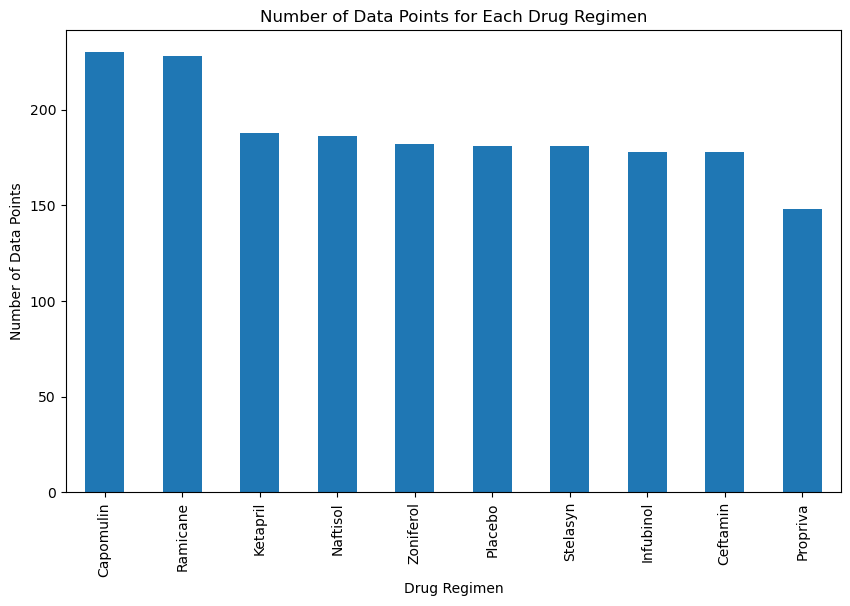

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_data["Drug Regimen"].value_counts()
regimen_counts.plot(kind="bar", figsize=(10, 6))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points for Each Drug Regimen")
plt.show()

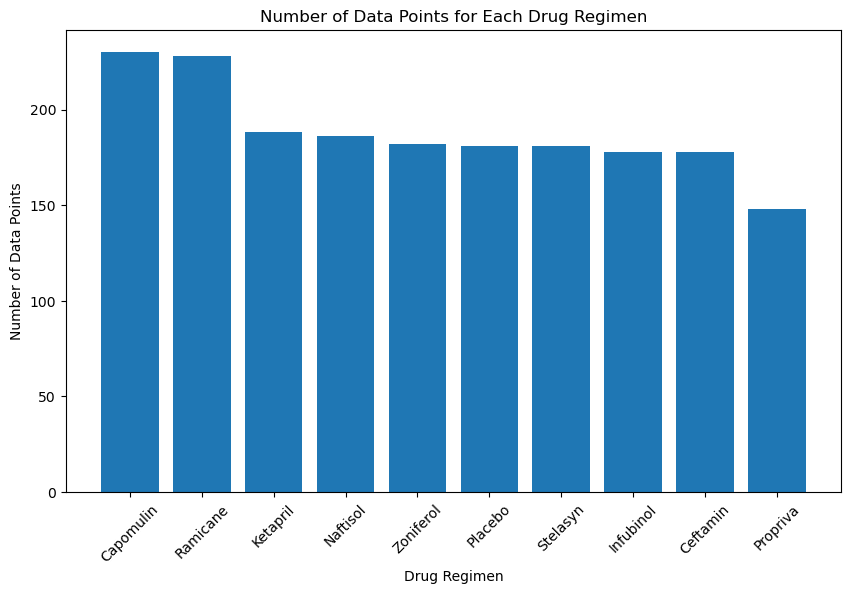

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = cleaned_data["Drug Regimen"].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points for Each Drug Regimen")
plt.xticks(rotation=45)
plt.show()

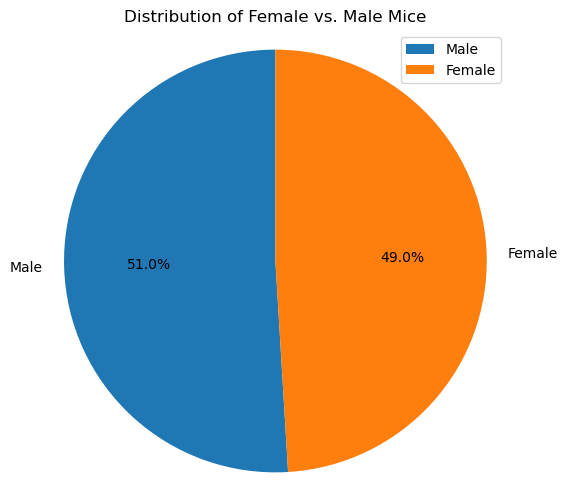

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = cleaned_data["Sex"].value_counts()
plt.figure(figsize=(6, 6))
gender_distribution.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Female vs. Male Mice")
plt.axis("equal")
plt.legend()
plt.gca().set_ylabel('')
plt.show()

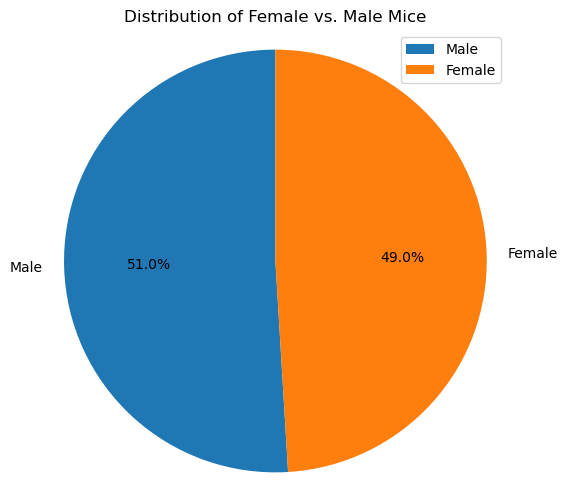

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = cleaned_data["Sex"].value_counts()
labels = gender_distribution.index
sizes = gender_distribution.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Female vs. Male Mice")
plt.axis("equal")
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Select the specific treatment regimens
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Get the last (greatest) timepoint for each mouse
last_timepoint = merged_data.groupby("Mouse ID")["Timepoint"].max()

# Create a DataFrame with the last timepoint for each mouse
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge the last timepoint DataFrame with the original merged data to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint_df, merged_data, on=["Mouse ID", "Timepoint"], how="left")

# Filter the final tumor volume data for the specific treatment regimens
final_tumor_volume = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(regimens)]


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Add subset of tumor volumes to the list
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the IQR for the current treatment regimen
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine the lower and upper bounds to identify potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Check for potential outliers
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the results
    print(f"Results for {treatment}:")
    print(f" - Lower Quartile: {lower_quartile}")
    print(f" - Upper Quartile: {upper_quartile}")
    print(f" - IQR: {iqr}")
    print(f" - Potential Outliers: {outliers}")
    print()


Results for Capomulin:
 - Lower Quartile: 32.37735684
 - Upper Quartile: 40.1592203
 - IQR: 7.781863460000004
 - Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Results for Ramicane:
 - Lower Quartile: 31.56046955
 - Upper Quartile: 40.65900627
 - IQR: 9.098536719999998
 - Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Results for Infubinol:
 - Lower Quartile: 54.04860769
 - Upper Quartile: 65.52574285
 - IQR: 11.477135160000003
 - Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Results for Ceftamin:
 - Lower Quartile: 48.72207785
 - Upper Quartile: 64.29983003
 - IQR: 15.577752179999997
 - Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



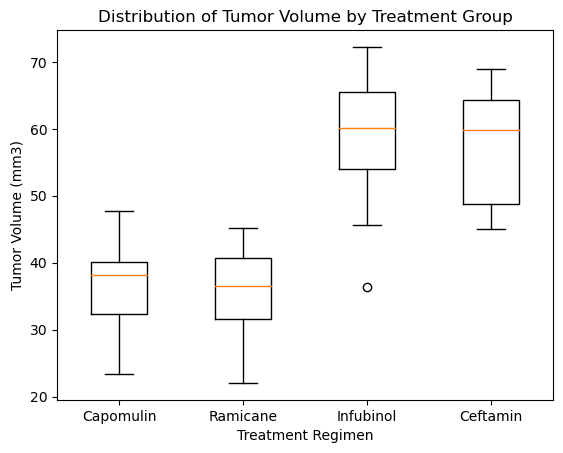

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list of tumor volume data for each treatment group
tumor_vol_data = [final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"] for treatment in treatments]

# Create the box plot
plt.boxplot(tumor_vol_data, labels=treatments)

# Set the title and labels
plt.title("Distribution of Tumor Volume by Treatment Group")
plt.xlabel("Treatment Regimen")
plt.ylabel("Tumor Volume (mm3)")

# Display the plot
plt.show()


## Line and Scatter Plots

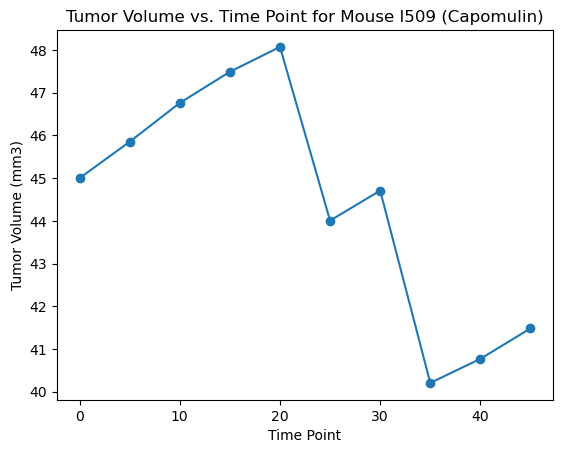

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choose a mouse ID from the Capomulin treatment group
mouse_id = "l509"

# Filter the data for the selected mouse ID and Capomulin treatment
mouse_data = merged_data.loc[(merged_data["Mouse ID"] == mouse_id) & (merged_data["Drug Regimen"] == "Capomulin")]

# Create the line plot
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker="o")

# Set the title and labels
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")

# Display the plot
plt.show()


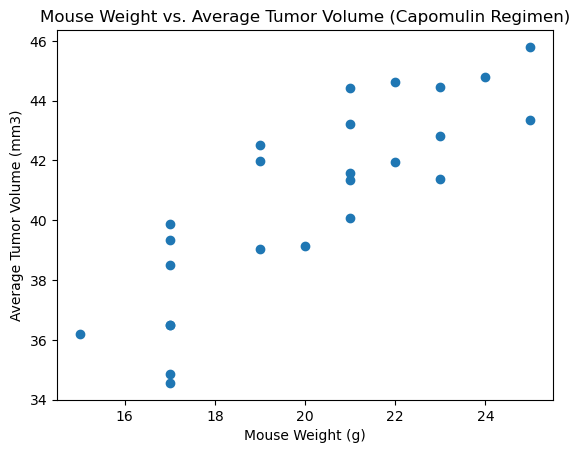

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding weight for each mouse
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

# Create the scatter plot
plt.scatter(mouse_weight, avg_tumor_volume)

# Set the title and labels
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display the plot
plt.show()


## Correlation and Regression

Correlation Coefficient = 0.84


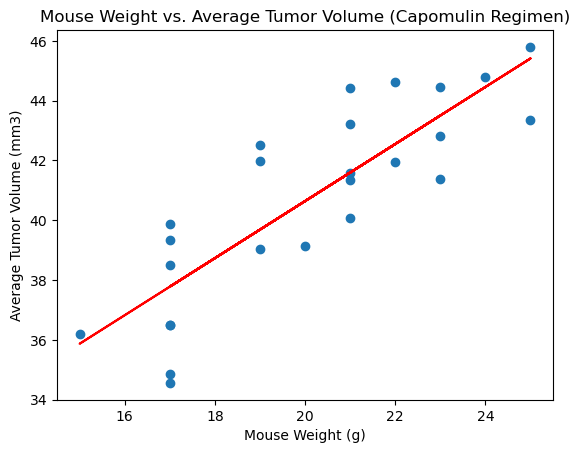

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Perform the linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, avg_tumor_volume)

# Calculate the correlation coefficient
correlation_coefficient = st.pearsonr(mouse_weight, avg_tumor_volume)[0]

# Print the correlation coefficient
print(f"Correlation Coefficient = {correlation_coefficient:.2f}")

# Create the regression line data
regression_line = slope * mouse_weight + intercept

# Create the scatter plot
plt.scatter(mouse_weight, avg_tumor_volume)

# Plot the regression line
plt.plot(mouse_weight, regression_line, color='red')

# Set the title and labels
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display the plot
plt.show()